In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
from mist_cf import common
from mist_cf.common.plot_utils import *

set_style()

/home/samlg/.conda/envs/ms-gen/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
fig_folder = Path("../results/figures/")
fig_folder = fig_folder / "benchmarking"
fig_folder.mkdir(parents=True, exist_ok=True)
# mdkir
fig_folder.mkdir(parents=True, exist_ok=True)
data_folder = Path("../data/nist_canopus/")
# rdbe_labels_file = data_folder / "decoy_labels/decoy_label_RDBE.tsv"
labels_file = data_folder / "labels.tsv"
labels = pd.read_csv(labels_file, sep="\t")

## Benchmark

In [3]:
res_folders = {
    "ffn_ms1": ["../results/ms1/", "../results/ms1_nist/"],
    "ffn_ms2": ["../results/ffn/", "../results/ffn_nist/"],
    "mist_cf_ms2": ["../results/mist_cf/", "../results/mist_cf_nist/"],
    "xformer": ["../results/xformer/", "../results/xformer_nist/"],
}

In [4]:
dict_list = [
    {"model": model_name, "folder": f}
    for model_name, folder_list in res_folders.items()
    for f in folder_list
]

In [5]:
all_dfs = []
for entry in dict_list:
    folder = Path(entry["folder"])
    model = entry["model"]
    # load results
    res_files = folder.rglob("full_out.tsv")
    for res_file in res_files:
        split = res_file.parent.parent.parent.name
        df = pd.read_csv(res_file, sep="\t")
        df["split"] = split
        df["model"] = model
        all_dfs.append(df)
all_df = pd.concat(all_dfs, ignore_index=True)

In [6]:
all_df.groupby(
    [
        "model",
        "split",
    ]
).mean()

ind_found  ind_found_adduct  \
model       split                                            
ffn_ms1     split_1             3.275283          1.291610   
            split_1_with_nist   3.024943          1.323356   
            split_2             3.209209          1.296826   
            split_2_with_nist   2.734019          1.304873   
            split_3             3.028037          1.266355   
            split_3_with_nist   2.684579          1.254673   
ffn_ms2     split_1             3.265760          1.245805   
            split_1_with_nist   3.055329          1.250340   
            split_2             3.105498          1.272240   
            split_2_with_nist   2.817613          1.278498   
            split_3             3.002804          1.187850   
            split_3_with_nist   2.873364          1.221028   
mist_cf_ms2 split_1             2.113379          1.202721   
            split_1_with_nist   1.967800          1.214512   
            split_2             2.277604          1.207868   
            split_2_with_nist   1.892266          1.225302   
            split_3             2.064486          1.159813   
            split_3_with_nist   1.878972          1.153738   
xformer     split_1             2.808163          1.238549   
            split_1_with_nist   3.241270          1.278458   
            split_2             2.871256          1.263299   
            split_2_with_nist   2.843540          1.328565   
            split_3             3.096729          1.229439   
            split_3_with_nist   2.807944          1.221963   

                               ind_found_full_form        mass  Top 1 acc.  \
model       split                                                            
ffn_ms1     split_1                       2.606349  409.918713    0.609524   
            split_1_with_nist             2.394104  409.918713    0.606803   
            split_2                       2.505141  426.684204    0.604381   
            split_2_with_nist             2.161377  426.684204    0.625391   
            split_3                       2.489252  413.449334    0.613551   
            split_3_with_nist             2.207944  413.449334    0.637383   
ffn_ms2     split_1                       2.652154  409.918713    0.643084   
            split_1_with_nist             2.375057  409.918713    0.642177   
            split_2                       2.536433  426.684204    0.611980   
            split_2_with_nist             2.231113  426.684204    0.648190   
            split_3                       2.582243  413.449334    0.649065   
            split_3_with_nist             2.378037  413.449334    0.665888   
mist_cf_ms2 split_1                       1.775057  409.918713    0.741497   
            split_1_with_nist             1.595465  409.918713    0.762812   
            split_2                       1.812696  426.684204    0.719714   
            split_2_with_nist             1.527045  426.684204    0.759946   
            split_3                       1.752804  413.449334    0.761682   
            split_3_with_nist             1.641121  413.449334    0.783178   
xformer     split_1                       2.360091  409.918713    0.652608   
            split_1_with_nist             2.551474  409.918713    0.615873   
            split_2                       2.271793  426.684204    0.636567   
            split_2_with_nist             2.162271  426.684204    0.603487   
            split_3                       2.619159  413.449334    0.627103   
            split_3_with_nist             2.328037  413.449334    0.659813   

                               Top 2 acc.  Top 3 acc.  Top 4 acc.  Top 5 acc.  \
model       split                                                               
ffn_ms1     split_1              0.776871    0.833560    0.873923    0.895692   
            split_1_with_nist    0.765533    0.828118    0.862585    0.888889   
            split_2              0.765311    0.825659    0.868574

In [26]:
# Build accuracy table
top_k = list(range(1, 4))
tbl_df = all_df.copy()
split_to_dataset = lambda x: "nist" if "with_nist" in x else "without nist"
tbl_df["dataset"] = tbl_df["split"].apply(split_to_dataset)

keep_rename_map = {f"Top {k} acc.": k for k in top_k}
keep_keys = list(keep_rename_map.keys())

# Group by split and model and take mean and std
agg_df = (
    tbl_df.groupby(["model", "dataset", "split"])
    .mean()[keep_keys]
    .sort_index()
    .reset_index()
)

sem_measure = lambda x: np.std(x) / np.sqrt(len(x))

# Reset split from index
mean_df = (
    agg_df.groupby(["model", "dataset"]).mean().reset_index().round(3).sort_index()
)
std_df = (
    agg_df.groupby(["model", "dataset"])
    .apply(sem_measure)
    .reset_index()
    .round(3)
    .sort_index()
    .replace(np.nan, 0)
)

error_df = mean_df.copy()
for k in keep_keys:
    # str concat mean df and std df
    error_df[k] = [
        rf"${mean_df[k][i]:.3f} \pm {std_df[k][i]:.3f}$" for i in range(len(mean_df))
    ]

# Rename models
error_df["model"] = error_df["model"].replace(rename_scheme)
error_df.rename(columns={"model": "Model", "dataset": "Dataset"}, inplace=True)
error_df.rename(columns=keep_rename_map, inplace=True)

# Melt so keys are "Model" "dataset" and "top k"
error_df = error_df.melt(
    id_vars=["Model", "Dataset"], var_name="Top k", value_name="Accuracy"
)
# Pivot so it's a multi index of "Dataset", "Top k, with "Accuracy" as values
error_df = error_df.pivot(
    columns=["Dataset", "Top k"], index="Model", values="Accuracy"
)
# Reorder columns
error_df = error_df[["without nist", "nist"]]
# Reorder rows by
error_df = error_df.reindex([rename_scheme[i] for i in model_order])
error_df.index.name = ""
display(error_df)
latex = error_df.to_latex(
    caption="Comparing MIST-CF with other baselines with top k accuary",
    label="tab:benchmark",
    escape=False,
)
print(latex)

/home/samlg/.conda/envs/ms-gen/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3613: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/home/samlg/.conda/envs/ms-gen/lib/python3.8/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


Dataset           without nist                                        \
Top k                        1                  2                  3   
                                                                       
MS1 Only     $0.609 \pm 0.002$  $0.773 \pm 0.003$  $0.833 \pm 0.003$   
FFN          $0.635 \pm 0.009$  $0.786 \pm 0.009$  $0.847 \pm 0.007$   
Transformer  $0.639 \pm 0.006$  $0.791 \pm 0.009$  $0.851 \pm 0.006$   
MIST-CF      $0.741 \pm 0.010$  $0.878 \pm 0.009$  $0.919 \pm 0.007$   

Dataset                   nist                                        
Top k                        1                  2                  3  
                                                                      
MS1 Only     $0.623 \pm 0.007$  $0.785 \pm 0.008$  $0.847 \pm 0.008$  
FFN          $0.652 \pm 0.006$  $0.804 \pm 0.009$  $0.867 \pm 0.008$  
Transformer  $0.626 \pm 0.014$  $0.772 \pm 0.008$  $0.840 \pm 0.011$  
MIST-CF      $0.769 \pm 0.006$  $0.897 \pm 0.007$  $0.931 \pm 0.005$

\begin{table}
\centering
\caption{Comparing MIST-CF with other baselines with top k accuary}
\label{tab:benchmark}
\begin{tabular}{lllllll}
\toprule
Dataset & \multicolumn{3}{l}{without nist} & \multicolumn{3}{l}{nist} \\
Top k &                  1 &                  2 &                  3 &                  1 &                  2 &                  3 \\
            &                    &                    &                    &                    &                    &                    \\
\midrule
MS1 Only    &  $0.609 \pm 0.002$ &  $0.773 \pm 0.003$ &  $0.833 \pm 0.003$ &  $0.623 \pm 0.007$ &  $0.785 \pm 0.008$ &  $0.847 \pm 0.008$ \\
FFN         &  $0.635 \pm 0.009$ &  $0.786 \pm 0.009$ &  $0.847 \pm 0.007$ &  $0.652 \pm 0.006$ &  $0.804 \pm 0.009$ &  $0.867 \pm 0.008$ \\
Transformer &  $0.639 \pm 0.006$ &  $0.791 \pm 0.009$ &  $0.851 \pm 0.006$ &  $0.626 \pm 0.014$ &  $0.772 \pm 0.008$ &  $0.840 \pm 0.011$ \\
MIST-CF     &  $0.741 \pm 0.010$ &  $0.878 \pm 0.009$ &  $0.919 \pm 0.

/tmp/ipykernel_1567777/4270192156.py:39: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex = error_df.to_latex(caption="Comparing MIST-CF with other baselines with top k accuary",


In [28]:
0.769 - 0.652

0.11699999999999999

## Line plot of acc

In [8]:
# Group by method, split, and compute top k accuracy through 20
def top_k_accuracy(x, top_k):
    k_dict = []
    for k in range(top_k):
        acc = np.mean(x["ind_found"] <= k)
        k_dict.append({"k": k, "acc": acc})
    return k_dict


top_k = 20
# top_k_acc = all_df.groupby(["model", "split",]).apply(lambda x: top_k_accuracy(x, top_k))

keys = ["model", "split"]
out_df = []
for names, sub_df in all_df.groupby(keys):
    update_dict = dict(zip(keys, names))
    sub_dicts = top_k_accuracy(sub_df, top_k)
    out_df.extend([dict(**i, **update_dict) for i in sub_dicts])
out_df = pd.DataFrame(out_df)

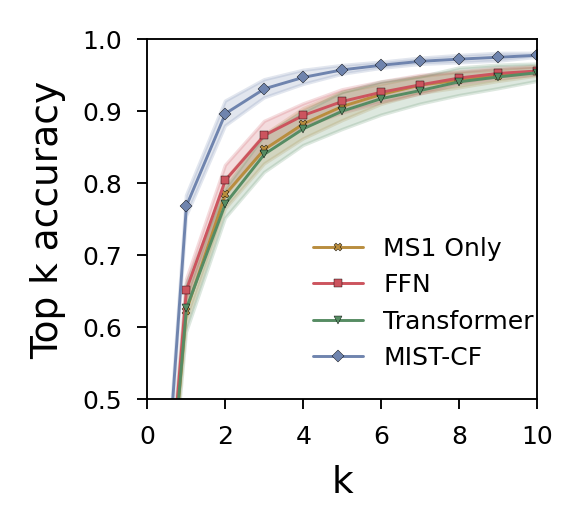

In [9]:
# Here just show the "with nist" result
# Plot out df as a line plot where each line is specific to a model, k is the x acc, and "acc" is the y axis
# Also use the splits to fill in the lines with error/deviation
# Plot the mean of the splits as a line, and the std as a shaded region

figsize = (1.3, 1.2)

# Filter outdf to only include splits with nist
out_df_nist = out_df[["nist" in j for j in out_df["split"]]]

fig = plt.figure(figsize=figsize, dpi=300)
ax = fig.add_subplot(111)
for model in model_order:
    subdf = out_df_nist[out_df_nist["model"] == model]
    mean_df = subdf.groupby("k").mean()
    std_df = subdf.groupby("k").std()
    # Get number of splits
    n_splits = subdf["split"].nunique()
    # Get stderror of mean and 95% conf
    std_err = std_df / np.sqrt(n_splits)
    conf = std_err * 1.96

    # Sort dfs by k
    mean_df = mean_df.sort_index()
    conf = conf.sort_index()

    # Plot mean
    ax.plot(
        mean_df.index,
        mean_df["acc"],
        label=rename_scheme[model],
        color=color_scheme[model],
        marker=marker_scheme[model],
        markeredgecolor="black",
        markeredgewidth=0.1,
        markersize=2,
        linewidth=0.7,
    )

    # Plot conf
    ax.fill_between(
        mean_df.index,
        mean_df["acc"] - conf["acc"],
        mean_df["acc"] + conf["acc"],
        alpha=0.2,
        color=color_scheme[model],
    )

ax.set_xlabel("k")
ax.set_ylabel("Top k accuracy")
ax.set_ylim(0.5, 1)
uplim = 10
ax.set_xlim(0, uplim)
ax.set_xticks(np.arange(0, uplim + 1, 2))
# ax.set_yscale("log")

# Make legend with no box
ax.legend(bbox_to_anchor=(0.4, 0.48), borderaxespad=0.0, frameon=False)
# fig.tight_layout()
# Save to fig folder
set_size(
    *figsize,
    ax,
)
fig.savefig(fig_folder / "top_k_acc.pdf", bbox_inches="tight", transparent=True)

## Plot top 1 acc with mass bins

In [10]:
def top_k_accuracy(x, top_k):
    k_dict = []
    for k in range(top_k):
        acc = np.mean(x["ind_found"] <= k)
        k_dict.append({"k": k, "acc": acc})
    return k_dict


top_k = 20
# top_k_acc = all_df.groupby(["model", "split",]).apply(lambda x: top_k_accuracy(x, top_k))

keys = [
    "model",
    "split",
    "mass_bin",
]
out_df = []
for names, sub_df in all_df.groupby(keys):
    update_dict = dict(zip(keys, names))
    sub_dicts = top_k_accuracy(sub_df, top_k)
    out_df.extend([dict(**i, **update_dict) for i in sub_dicts])
out_df = pd.DataFrame(out_df)

In [11]:
# Subset to k = 1, split has nist
out_df_nist = out_df[
    (out_df["k"] == 1) & (np.array(["nist" in i for i in out_df["split"]]))
]
mass_bins = out_df_nist["mass_bin"].unique()
x_ticks = np.arange(len(mass_bins))
x_ticks_dict = dict(zip(mass_bins, x_ticks))
out_df_nist["x"] = out_df_nist["mass_bin"].map(x_ticks_dict)
out_df_nist;

/tmp/ipykernel_1567777/1564527537.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_df_nist['x'] = out_df_nist['mass_bin'].map(x_ticks_dict)


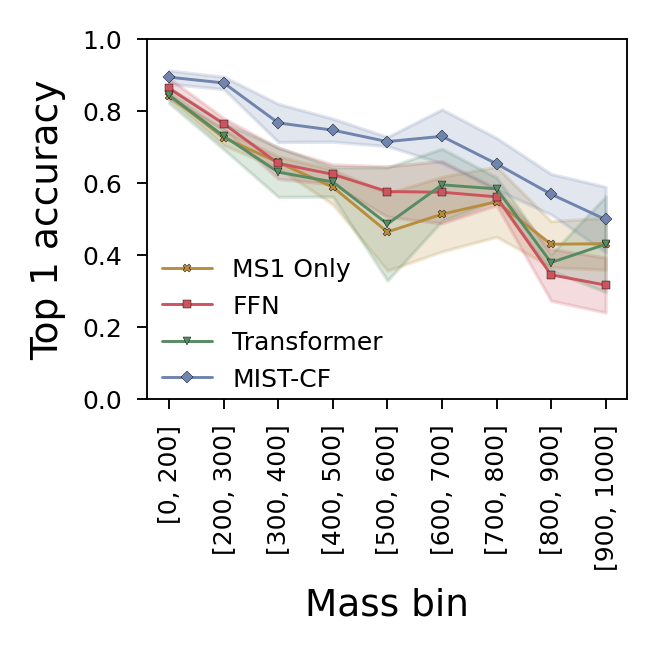

In [12]:
figsize = (1.6, 1.2)
fig = plt.figure(figsize=figsize, dpi=300)
ax = fig.add_subplot(111)
or model in model_order:
    subdf = out_df_nist[out_df_nist["model"] == model]
    mean_df = subdf.groupby("x").mean()
    std_df = subdf.groupby("x").std()
    # Get number of splits
    n_splits = subdf["split"].nunique()
    # Get stderror of mean and 95% conf
    std_err = std_df / np.sqrt(n_splits)
    conf = std_err * 1.96

    # Sort dfs by k
    mean_df = mean_df.sort_index()
    conf = conf.sort_index()

    # Plot mean
    ax.plot(
        mean_df.index,
        mean_df["acc"],
        label=rename_scheme[model],
        color=color_scheme[model],
        marker=marker_scheme[model],
        markeredgecolor="black",
        markeredgewidth=0.1,
        markersize=2,
        linewidth=0.7,
    )

    # Plot conf
    ax.fill_between(
        mean_df.index,
        mean_df["acc"] - conf["acc"],
        mean_df["acc"] + conf["acc"],
        alpha=0.2,
        color=color_scheme[model],
    )

ax.set_xlabel("Mass bin")
ax.set_ylabel("Top 1 accuracy")
ax.set_ylim(0.0, 1)

# Set x tick labels
ax.set_xticks(x_ticks)
ax.set_xticklabels(mass_bins, rotation=90)


# Make legend with no box
ax.legend(
    bbox_to_anchor=(0.01, 0.42),
    loc=2,
    borderaxespad=0.0,
    frameon=False,
    # Less padding
    # handletextpad=0.2,
)
# fig.tight_layout()
# Save to fig folder
set_size(
    *figsize,
    ax,
)
fig.savefig(fig_folder / "top_k_acc_masses.pdf", bbox_inches="tight", transparent=True)

## Plot adduct accuracies

In [13]:
def top_k_accuracy(x, top_k):
    k_dict = []
    for k in range(top_k):
        acc = np.mean(x["ind_found"] <= k)
        k_dict.append({"k": k, "acc": acc})
    return k_dict


top_k = 20

keys = [
    "model",
    "split",
    "true_ion",
]
out_df = []
for names, sub_df in all_df.groupby(keys):
    update_dict = dict(zip(keys, names))
    sub_dicts = top_k_accuracy(sub_df, top_k)
    out_df.extend([dict(**i, **update_dict) for i in sub_dicts])
out_df = pd.DataFrame(out_df)

In [14]:
## Subset to k = 1, split has nist
out_df_nist = out_df[
    (out_df["k"] == 1) & (np.array(["nist" in i for i in out_df["split"]]))
]
true_ions = out_df_nist["true_ion"].unique()

counts = all_df.groupby("true_ion").count()["spec"]
# Sort by counts
true_ions = counts.sort_values(ascending=False).index

x_ticks = np.arange(len(true_ions))
x_ticks_dict = dict(zip(true_ions, x_ticks))
out_df_nist["x"] = out_df_nist["true_ion"].map(x_ticks_dict)
out_df_nist;

/tmp/ipykernel_1567777/2768846676.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_df_nist['x'] = out_df_nist['true_ion'].map(x_ticks_dict)


In [15]:
counts, true_ions

(true_ion
 [M+H3N+H]+      3576
 [M+H]+         39328
 [M+K]+            72
 [M+Na]+         5096
 [M-H2O+H]+      3512
 [M-H4O2+H]+      912
 [M]+             160
 Name: spec, dtype: int64,
 Index(['[M+H]+', '[M+Na]+', '[M+H3N+H]+', '[M-H2O+H]+', '[M-H4O2+H]+', '[M]+',
        '[M+K]+'],
       dtype='object', name='true_ion'))

In [16]:
x_ticks_dict

{'[M+H]+': 0,
 '[M+Na]+': 1,
 '[M+H3N+H]+': 2,
 '[M-H2O+H]+': 3,
 '[M-H4O2+H]+': 4,
 '[M]+': 5,
 '[M+K]+': 6}

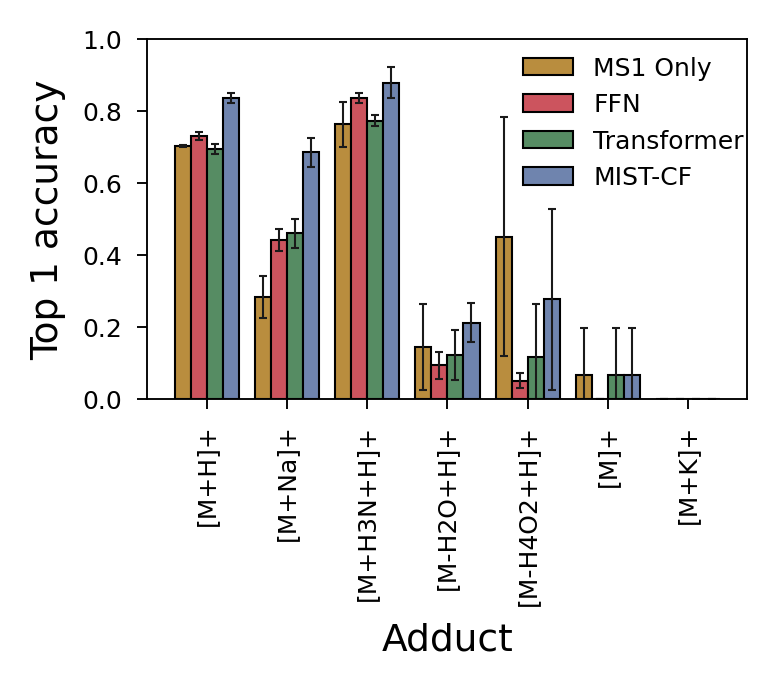

In [24]:
figsize = (2, 1.2)
fig = plt.figure(figsize=figsize, dpi=300)
ax = fig.add_subplot(111)

# Use matplotlib and plot multibar plots where each x tick is an adduct and each bar is a model
num_models = len(model_order)
model_x_dict = {}
model_y_dict = {}
model_conf_dict = {}

bar_width = 0.2


for i, model in enumerate(model_order):
    subdf = out_df_nist[out_df_nist["model"] == model]

    mean_df = subdf.groupby("x").mean()
    std_df = subdf.groupby("x").std()

    # Sort by x

    # Get number of splits
    n_splits = subdf["split"].nunique()
    # Get stderror of mean and 95% conf
    std_err = std_df / np.sqrt(n_splits)

    # display(std_df)
    conf_df = std_err * 1.96

    mean = mean_df.sort_index()
    conf = conf_df.sort_index()
    mean = mean_df["acc"]
    conf = conf_df["acc"]
    x = mean_df.index

    # Plot bar
    ax.bar(
        x + i * bar_width,
        mean,
        yerr=conf,
        color=color_scheme[model],
        label=rename_scheme[model],
        width=bar_width,  # Add black lines around bars
        edgecolor="black",
        linewidth=0.5,
        # Set error bar style to be aesthetic
        error_kw=dict(
            lw=0.5,
            capsize=1,
            capthick=0.5,
        ),
    )


# Label x ticks
ax.set_xticks(x_ticks + bar_width * (len(model_order) - 1) / 2)
ax.set_xticklabels(true_ions, rotation=90)
ax.set_xlabel("Adduct")

# Label y
ax.set_ylabel("Top 1 accuracy")
ax.set_ylim(0.0, 1)

# Set legend
ax.legend(
    bbox_to_anchor=(0.61, 0.98),
    loc=2,
    borderaxespad=0.0,
    frameon=False,
)

# fig.tight_layout()
# Save to fig folder
set_size(
    *figsize,
    ax,
)
fig.savefig(fig_folder / "top_k_acc_adducts.pdf", bbox_inches="tight", transparent=True)